In [61]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

transform = transforms.ToTensor()

dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

classes = train_dataset.classes
print("All classes:", classes)

binary_classes = ['cat', 'dog']
binary_class_indices = [classes.index(c) for c in binary_classes]

binary_train_indices = [i for i, (_, label) in enumerate(train_dataset) if label in binary_class_indices]
binary_test_indices = [i for i, (_, label) in enumerate(test_dataset) if label in binary_class_indices]

binary_train = Subset(train_dataset, binary_train_indices)
binary_test = Subset(test_dataset, binary_test_indices)

binary_train_loader = DataLoader(binary_train, batch_size=16, shuffle=True)
binary_test_loader = DataLoader(binary_test, batch_size=16, shuffle=False)

print("Binary classification classes:", binary_classes)
for images, labels in binary_train_loader:
    print("Batch shape:", images.shape)
    break

multi_classes = ['airplane', 'automobile', 'bird', 'cat']
multi_class_indices = [classes.index(c) for c in multi_classes]

multi_train_indices = [i for i, (_, label) in enumerate(train_dataset) if label in multi_class_indices]
multi_test_indices = [i for i, (_, label) in enumerate(test_dataset) if label in multi_class_indices]

multi_train = Subset(train_dataset, multi_train_indices)
multi_test = Subset(test_dataset, multi_test_indices)

multi_train_loader = DataLoader(multi_train, batch_size=16, shuffle=True)
multi_test_loader = DataLoader(multi_test, batch_size=16, shuffle=False)

print("Multiclass classification classes:", multi_classes)
for images, labels in multi_train_loader:
    print("Batch shape:", images.shape)
    break


All classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Binary classification classes: ['cat', 'dog']
Batch shape: torch.Size([16, 3, 32, 32])
Multiclass classification classes: ['airplane', 'automobile', 'bird', 'cat']
Batch shape: torch.Size([16, 3, 32, 32])


In [5]:
mean = (0.4914, 0.4822, 0.4465)
std = (0.2023, 0.1994, 0.2010)

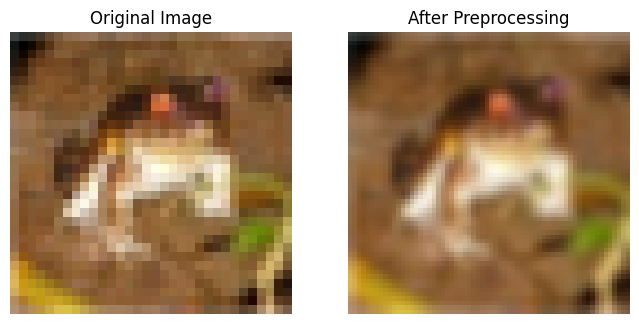

Shape after preprocessing: torch.Size([3, 64, 64])


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)

transform = transforms.Compose([
    transforms.Resize((64, 64)),     
    transforms.ToTensor(),           
    transforms.Normalize(            
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
    )
])

raw_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True
)

processed_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

raw_image, _ = raw_dataset[0]
processed_image, _ = processed_dataset[0]

def show_images(raw, processed):

    fig, axes = plt.subplots(1, 2, figsize=(8,4))

    axes[0].imshow(raw)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    img = processed.clone()
    img = img * torch.tensor((0.2023, 0.1994, 0.2010)).view(3,1,1)
    img = img + torch.tensor((0.4914, 0.4822, 0.4465)).view(3,1,1)
    img = img.permute(1,2,0).numpy()

    axes[1].imshow(img)
    axes[1].set_title("After Preprocessing")
    axes[1].axis("off")

    plt.show()

show_images(raw_image, processed_image)

print("Shape after preprocessing:", processed_image.shape)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BaselineCNN(nn.Module):
    def __init__(self, num_classes):
        super(BaselineCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2),                              

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [43]:
binary_model = BaselineCNN(num_classes=2)
print(binary_model)


BaselineCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [44]:
multi_model = BaselineCNN(num_classes=4)
print(multi_model)


BaselineCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=4, bias=True)
  )
)


In [45]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total trainable parameters:", count_parameters(binary_model))


Total trainable parameters: 2191170


In [14]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [46]:
from torchinfo import summary

summary(binary_model, input_size=(1, 3, 64, 64))


Layer (type:depth-idx)                   Output Shape              Param #
BaselineCNN                              [1, 2]                    --
├─Sequential: 1-1                        [1, 128, 8, 8]            --
│    └─Conv2d: 2-1                       [1, 32, 64, 64]           896
│    └─ReLU: 2-2                         [1, 32, 64, 64]           --
│    └─MaxPool2d: 2-3                    [1, 32, 32, 32]           --
│    └─Conv2d: 2-4                       [1, 64, 32, 32]           18,496
│    └─ReLU: 2-5                         [1, 64, 32, 32]           --
│    └─MaxPool2d: 2-6                    [1, 64, 16, 16]           --
│    └─Conv2d: 2-7                       [1, 128, 16, 16]          73,856
│    └─ReLU: 2-8                         [1, 128, 16, 16]          --
│    └─MaxPool2d: 2-9                    [1, 128, 8, 8]            --
├─Sequential: 1-2                        [1, 2]                    --
│    └─Flatten: 2-10                     [1, 8192]                 --
│    └

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BaselineCNN(num_classes=2)  
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10


In [48]:
from torch.utils.data import DataLoader

train_loader = DataLoader(binary_train, batch_size=32, shuffle=True)
test_loader = DataLoader(binary_test, batch_size=32, shuffle=False)


In [49]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2048 and 8192x256)

Task 1

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

transform = transforms.ToTensor()

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
test_dataset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)

binary_classes = [3, 5]
binary_indices = [i for i, (_, label) in enumerate(train_dataset) if label in binary_classes]
binary_train = Subset(train_dataset, binary_indices)

binary_loader = DataLoader(binary_train, batch_size=32, shuffle=True)

multi_classes = [3, 5, 7]  
multi_indices = [i for i, (_, label) in enumerate(train_dataset) if label in multi_classes]
multi_train = Subset(train_dataset, multi_indices)

multi_loader = DataLoader(multi_train, batch_size=32, shuffle=True)

images, labels = next(iter(binary_loader))
print("Binary batch shape:", images.shape)
print("Binary number of classes:", len(binary_classes))

images_m, labels_m = next(iter(multi_loader))
print("Multiclass batch shape:", images_m.shape)
print("Multiclass number of classes:", len(multi_classes))


Binary batch shape: torch.Size([32, 3, 32, 32])
Binary number of classes: 2
Multiclass batch shape: torch.Size([32, 3, 32, 32])
Multiclass number of classes: 3


Task 2

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=False,
    transform=transform
)


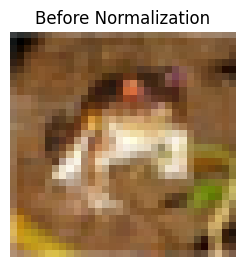

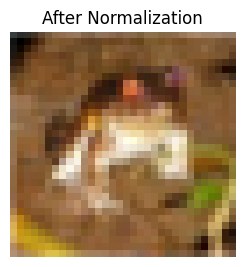

In [3]:
transform_raw = transforms.ToTensor()

raw_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=False,
    transform=transform_raw
)

img_raw, label = raw_dataset[0]
plt.subplot(1,2,1)
plt.imshow(img_raw.permute(1, 2, 0))
plt.title("Before Normalization")
plt.axis("off")
plt.show()

img_norm, label = train_dataset[0]
img_display = img_norm * 0.5 + 0.5
plt.subplot(1,2,2)
plt.imshow(img_display.permute(1, 2, 0))
plt.title("After Normalization")
plt.axis("off")
plt.show()




Task 3

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BaselineCNN(nn.Module):
    def __init__(self, num_classes):
        super(BaselineCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [5]:
binary_model = BaselineCNN(num_classes=2)
print(binary_model)
multi_model = BaselineCNN(num_classes=3)
print(multi_model)

BaselineCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)
BaselineCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Binary model parameters:", count_parameters(binary_model))
print("Multiclass model parameters:", count_parameters(multi_model))

Binary model parameters: 544066
Multiclass model parameters: 544195


Task 4

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [8]:
model = BaselineCNN(num_classes=2)  # 2 для binary, 3 для multiclass
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:
model = BaselineCNN(num_classes=3)  # 2 для binary, 3 для multiclass
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
def train_model(model, train_loader, epochs=10):
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")



In [11]:
def evaluate_model(model, test_loader):
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    return acc, precision, recall, f1


In [12]:
multi_classes = [3, 5, 7]  # cat, dog, horse
class_map = {3: 0, 5: 1, 7: 2}

In [13]:
class CustomSubset(torch.utils.data.Dataset):
    def __init__(self, dataset, indices, class_map):
        self.dataset = dataset
        self.indices = indices
        self.class_map = class_map

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image, label = self.dataset[self.indices[idx]]
        label = self.class_map[label]  # перенумерация
        return image, label


In [14]:
binary_classes = [3, 5]
binary_map = {3: 0, 5: 1}


In [15]:
indices_multi = [i for i, (_, label) in enumerate(train_dataset) if label in multi_classes]

multi_train = CustomSubset(train_dataset, indices_multi, class_map)

multi_loader = DataLoader(multi_train, batch_size=32, shuffle=True)


In [16]:
train_model(model, multi_loader, epochs=10)
evaluate_model(model, multi_loader)

Epoch [1/10], Loss: 0.8167
Epoch [2/10], Loss: 0.6416
Epoch [3/10], Loss: 0.5496
Epoch [4/10], Loss: 0.4773
Epoch [5/10], Loss: 0.4022
Epoch [6/10], Loss: 0.3210
Epoch [7/10], Loss: 0.2380
Epoch [8/10], Loss: 0.1668
Epoch [9/10], Loss: 0.1133
Epoch [10/10], Loss: 0.0678
Accuracy: 0.9901333333333333
Precision: 0.9901425957283068
Recall: 0.9901333333333333
F1-score: 0.9901366485340839


(0.9901333333333333,
 0.9901425957283068,
 0.9901333333333333,
 0.9901366485340839)

Task 5

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

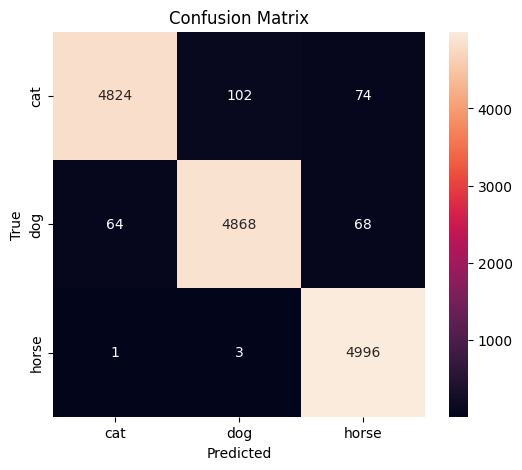

In [55]:
class_names = ["cat", "dog", "horse"]
plot_confusion_matrix(model, multi_loader, class_names)


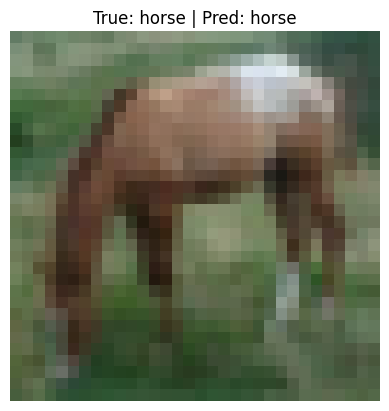

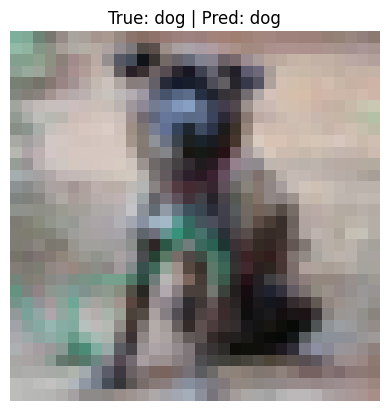

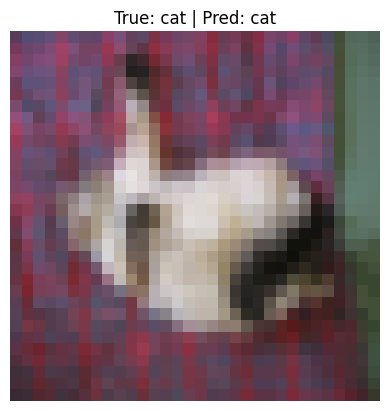

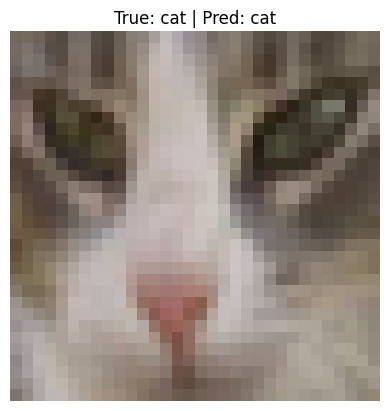

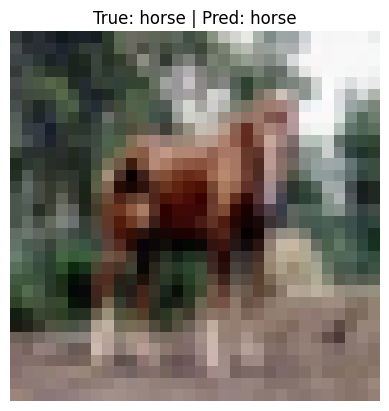

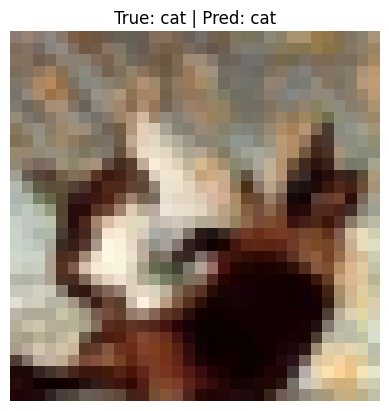

In [56]:
def show_predictions(model, test_loader, class_names, num_images=6):
    model.eval()
    
    images_shown = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            for i in range(images.size(0)):
                if images_shown >= num_images:
                    return
                
                img = images[i].cpu() * 0.5 + 0.5
                img = img.permute(1, 2, 0)
                
                plt.imshow(img)
                plt.title(f"True: {class_names[labels[i]]} | Pred: {class_names[preds[i]]}")
                plt.axis("off")
                plt.show()
                
                images_shown += 1

show_predictions(model, multi_loader, class_names)


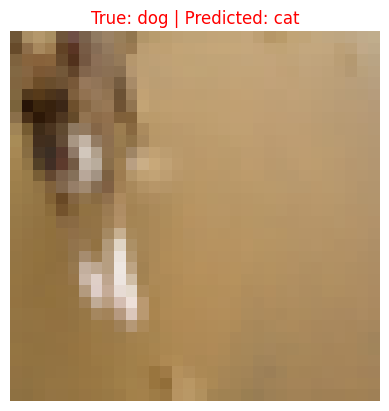

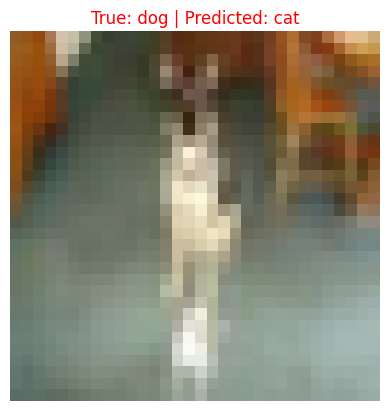

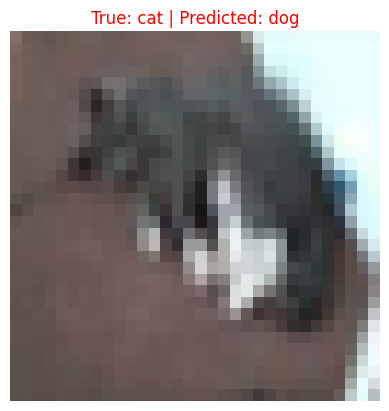

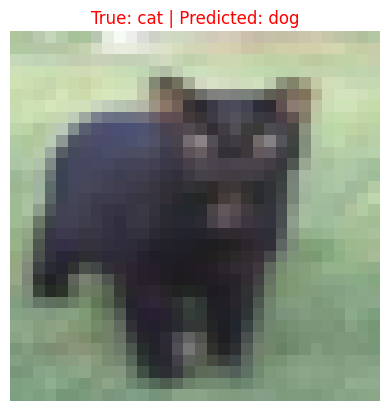

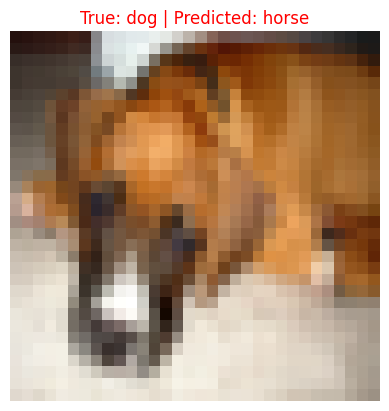

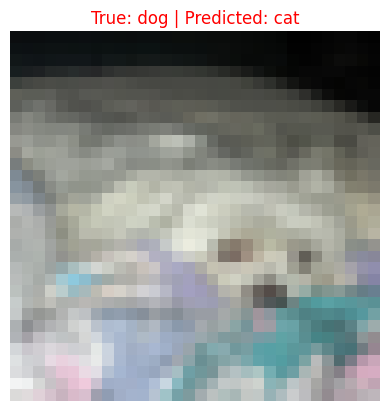

In [57]:
import matplotlib.pyplot as plt

def show_misclassified(model, test_loader, class_names, num_images=6):
    model.eval()
    
    shown = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            for i in range(images.size(0)):
                if preds[i] != labels[i]:
                    
                    img = images[i].cpu()
                    
                    img = img * 0.5 + 0.5
                    
                    img = img.permute(1, 2, 0)
                    
                    plt.imshow(img)
                    plt.title(
                        f"True: {class_names[labels[i]]} | Predicted: {class_names[preds[i]]}",
                        color="red"
                    )
                    plt.axis("off")
                    plt.show()
                    
                    shown += 1
                    
                    if shown >= num_images:
                        return
                    
show_misclassified(model, multi_loader, class_names)

Task 6

In [58]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))   # 32 -> 16
        x = self.pool(F.relu(self.bn2(self.conv2(x))))   # 16 -> 8
        x = self.pool(F.relu(self.bn3(self.conv3(x))))   # 8 -> 4
        
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

improved_model = ImprovedCNN(num_classes=3)
print(improved_model)


ImprovedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=3, bias=True)
)


In [59]:
improved_model = ImprovedCNN(num_classes=3)  # 2 или 3
improved_model = improved_model.to(device)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(improved_model.parameters(), lr=0.001)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(improved_model.parameters(), lr=0.001)
train_model(improved_model, multi_loader, epochs=10)
evaluate_model(improved_model, multi_loader)

Epoch [1/10], Loss: 0.8504
Epoch [2/10], Loss: 0.6751
Epoch [3/10], Loss: 0.6102
Epoch [4/10], Loss: 0.5593
Epoch [5/10], Loss: 0.5124
Epoch [6/10], Loss: 0.4633
Epoch [7/10], Loss: 0.4255
Epoch [8/10], Loss: 0.3888
Epoch [9/10], Loss: 0.3527
Epoch [10/10], Loss: 0.3181
Accuracy: 0.9252666666666667
Precision: 0.9269906445782188
Recall: 0.9252666666666667
F1-score: 0.9252173021361856


(0.9252666666666667,
 0.9269906445782188,
 0.9252666666666667,
 0.9252173021361856)

Task 7

In [62]:
def train_with_history(model, train_loader, optimizer, epochs=10):
    model.train()
    history = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        history.append(epoch_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}")
    
    return history


In [67]:
binary_classes = [3, 5]

binary_train = BinaryDataset(train_dataset, binary_classes)
binary_test  = BinaryDataset(test_dataset, binary_classes)

binary_train_loader = DataLoader(binary_train, batch_size=32, shuffle=True)
binary_test_loader  = DataLoader(binary_test, batch_size=32, shuffle=False)


In [ ]:
model_adam = ImprovedCNN(num_classes=3).to(device)

optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.001)

history_adam = train_with_history(model_adam, multi_loader, optimizer_adam, epochs=10)




Epoch [1/10] Loss: 0.8411
Epoch [2/10] Loss: 0.6793
Epoch [3/10] Loss: 0.6104
Epoch [4/10] Loss: 0.5537


In [64]:
# Multiclass test dataset (cat, dog, horse)
multi_classes = [3, 5, 7]

test_indices_multi = [
    i for i, (_, label) in enumerate(test_dataset)
    if label in multi_classes
]

multi_test = Subset(test_dataset, test_indices_multi)

test_loader = DataLoader(multi_test, batch_size=32, shuffle=False)


In [65]:
print("Adam results:")
evaluate_model(model_adam, test_loader)


Adam results:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.0, 0.0, 0.0, 0.0)

In [66]:
model_sgd = ImprovedCNN(num_classes=3).to(device)

optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)

history_sgd = train_with_history(model_sgd, multi_loader, optimizer_sgd, epochs=10)

print("SGD results:")
evaluate_model(model_sgd, test_loader)


Epoch [1/10] Loss: 0.9106
Epoch [2/10] Loss: 0.8157
Epoch [3/10] Loss: 0.7642
Epoch [4/10] Loss: 0.7089
Epoch [5/10] Loss: 0.6752
Epoch [6/10] Loss: 0.6327
Epoch [7/10] Loss: 0.6027
Epoch [8/10] Loss: 0.5737
Epoch [9/10] Loss: 0.5388
Epoch [10/10] Loss: 0.5004
SGD results:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.0, 0.0, 0.0, 0.0)

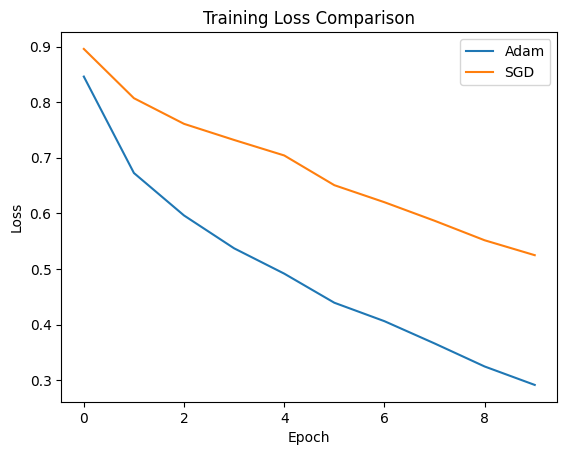

In [43]:
import matplotlib.pyplot as plt

plt.plot(history_adam, label="Adam")
plt.plot(history_sgd, label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()
